In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
file_path = r"C:\Users\HP\Mall_Customers.csv"  
df = pd.read_csv(file_path)


In [23]:
df.head()  # Shows first 5 rows


,facility_name,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
summary_stats = df.describe(include='all')  # Includes numerical and categorical columns
print(summary_stats)

# Additional statistics
print("\nVariance:\n", df.var(numeric_only=True))  # Variance
print("\nRange:\n", df.max(numeric_only=True) - df.min(numeric_only=True))  # Range
print("\nPercentiles:\n", df.quantile([0.25, 0.5, 0.75], numeric_only=True))



        facility_name   Genre         Age  Annual Income (k$)  \
count      200.000000     200  200.000000          200.000000   
unique            NaN       2         NaN                 NaN   
top               NaN  Female         NaN                 NaN   
freq              NaN     112         NaN                 NaN   
mean       100.500000     NaN   38.850000           60.560000   
std         57.879185     NaN   13.969007           26.264721   
min          1.000000     NaN   18.000000           15.000000   
25%         50.750000     NaN   28.750000           41.500000   
50%        100.500000     NaN   36.000000           61.500000   
75%        150.250000     NaN   49.000000           78.000000   
max        200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  

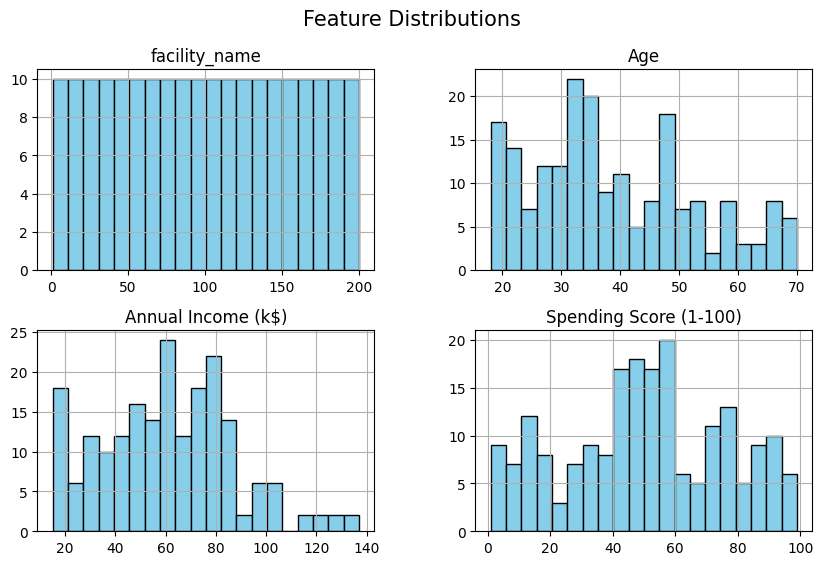

In [26]:
df.hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()


In [27]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Fill missing values (if applicable)
df.fillna(df.mean(numeric_only=True), inplace=True)


facility_name             0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [32]:
df2 = pd.read_csv(r"F:\VIIT\TRI_By_Name_1987_2014.csv")
merged_df = pd.merge(df, df2, on="facility_name", how="inner")


In [31]:
df["facility_name"] = df["facility_name"].astype(str)
df2["facility_name"] = df2["facility_name"].astype(str)

merged_df = pd.merge(df, df2, on="facility_name", how="inner")


In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])  # Example for 'Gender' column


In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Spending Score (1-100)'])  # Corrected column name
y = df['Spending Score (1-100)']  # Corrected target column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.0


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=100)
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [46]:
print(y_train.value_counts())


Spending Score (1-100)
42    8
55    7
46    6
73    5
14    4
     ..
45    1
8     1
78    1
9     1
13    1
Name: count, Length: 77, dtype: int64
